<a href="https://colab.research.google.com/github/sibadrita23/VisionSuite-Comprehensive-Computer-Vision-Toolkit/blob/main/VisionSuite_Comprehensive_Computer_Vision_Toolkit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

!pip install tensorflow matplotlib


In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


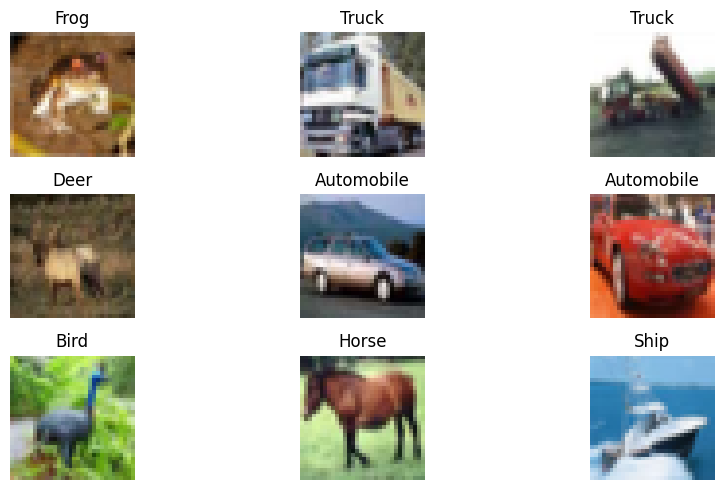

In [3]:
# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Normalize the images
x_train = x_train / 255.0
x_test = x_test / 255.0

# Convert labels to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Display some sample images
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
plt.figure(figsize=(10, 5))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(x_train[i])
    plt.title(class_names[np.argmax(y_train[i])])
    plt.axis('off')
plt.tight_layout()
plt.show()


In [4]:
# Load the pre-trained MobileNetV2
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Freeze the base model layers
base_model.trainable = False

# Add custom layers
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()


<ipython-input-4-ebddb75a558d>:2: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(32, 32, 3))


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224 (Functional)    │ (None, 1, 1, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         163,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,423,242 (9.24 MB)

 Trainable params: 165,258 (645.54 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [5]:
# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)
datagen.fit(x_train)

# Train the model
history = model.fit(datagen.flow(x_train, y_train, batch_size=64),
                    validation_data=(x_test, y_test),
                    epochs=10)


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


782/782 ━━━━━━━━━━━━━━━━━━━━ 94s 110ms/step - accuracy: 0.2085 - loss: 2.1372 - val_accuracy: 0.2914 - val_loss: 1.9525
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 85s 108ms/step - accuracy: 0.2618 - loss: 2.0036 - val_accuracy: 0.3049 - val_loss: 1.9270
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 143s 110ms/step - accuracy: 0.2719 - loss: 1.9881 - val_accuracy: 0.3053 - val_loss: 1.9145
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 140s 107ms/step - accuracy: 0.2767 - loss: 1.9758 - val_accuracy: 0.3057 - val_loss: 1.9016
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 105ms/step - accuracy: 0.2751 - loss: 1.9764 - val_accuracy: 0.3105 - val_loss: 1.8946
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 105ms/step - accuracy: 0.2799 - loss: 1.9717 - val_accuracy: 0.3160 - val_loss: 1.8841
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 104ms/step - accuracy: 0.2801 - loss: 1.9652 - val_accuracy: 0.3199 - val_loss: 1.8759
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 87s 110ms/step - accuracy: 0.2831 - loss: 1.9596 - v

313/313 - 9s - 28ms/step - accuracy: 0.3356 - loss: 1.8625
Test Accuracy: 33.56%


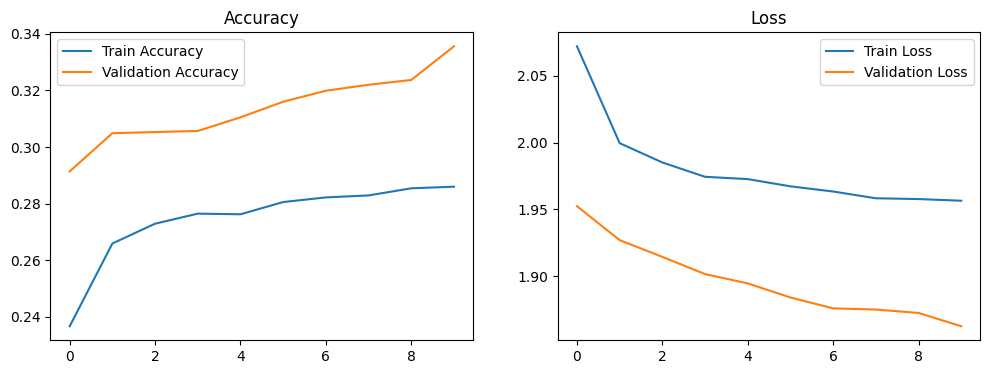

In [6]:
# Evaluate the model on test data
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


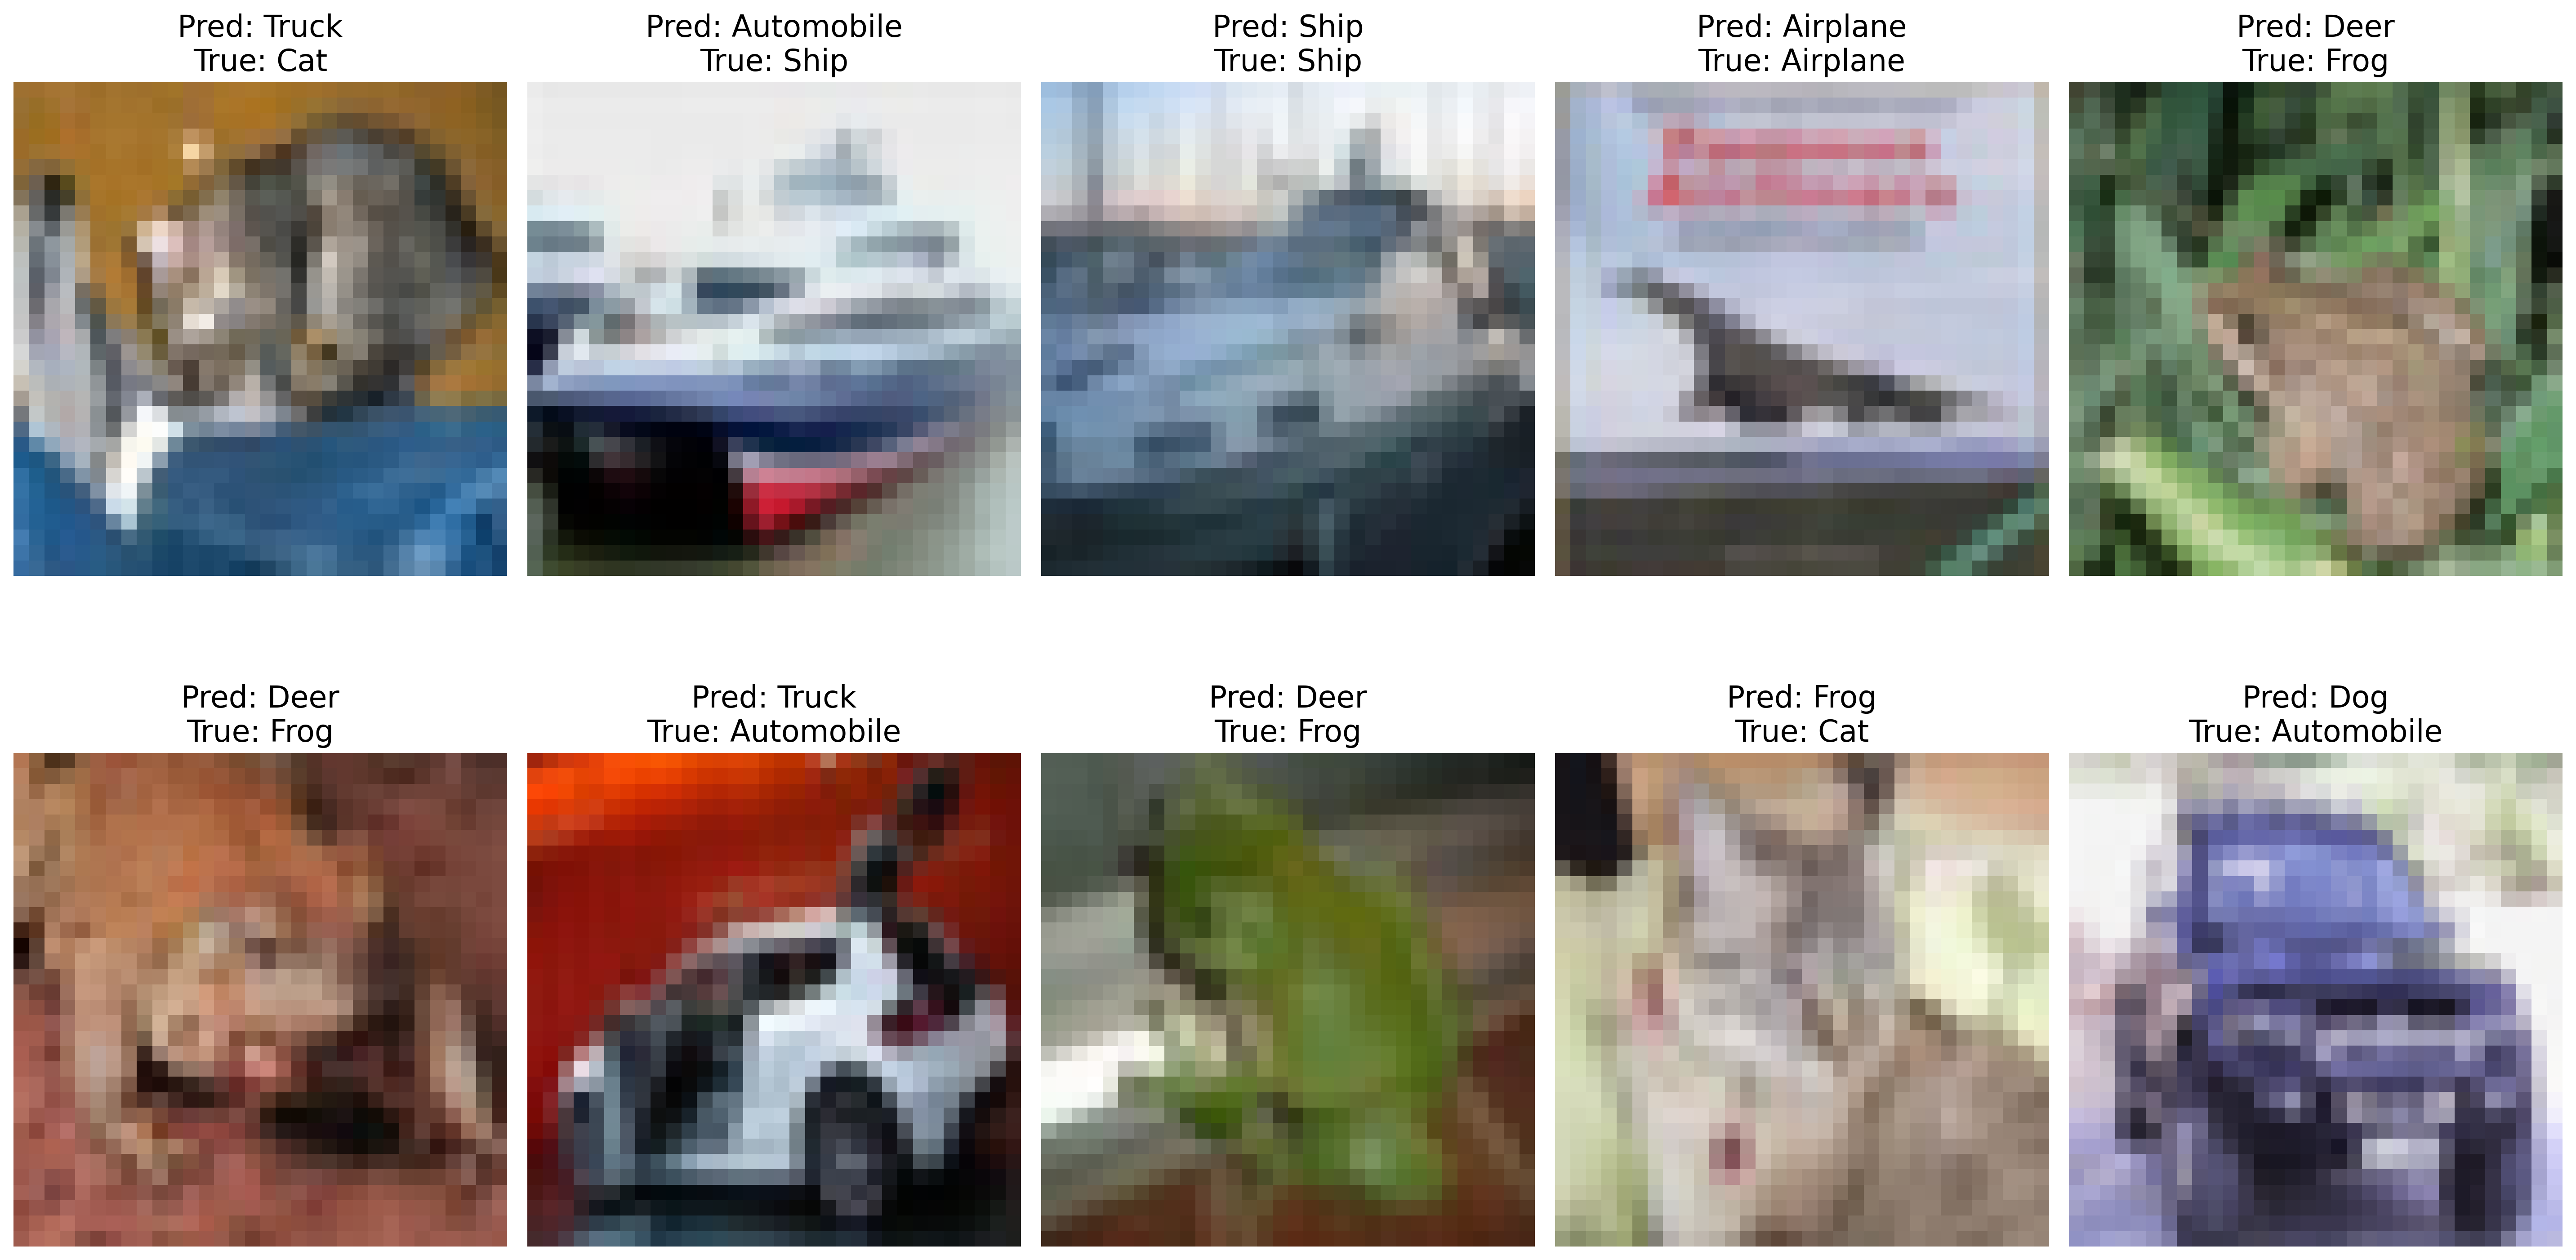

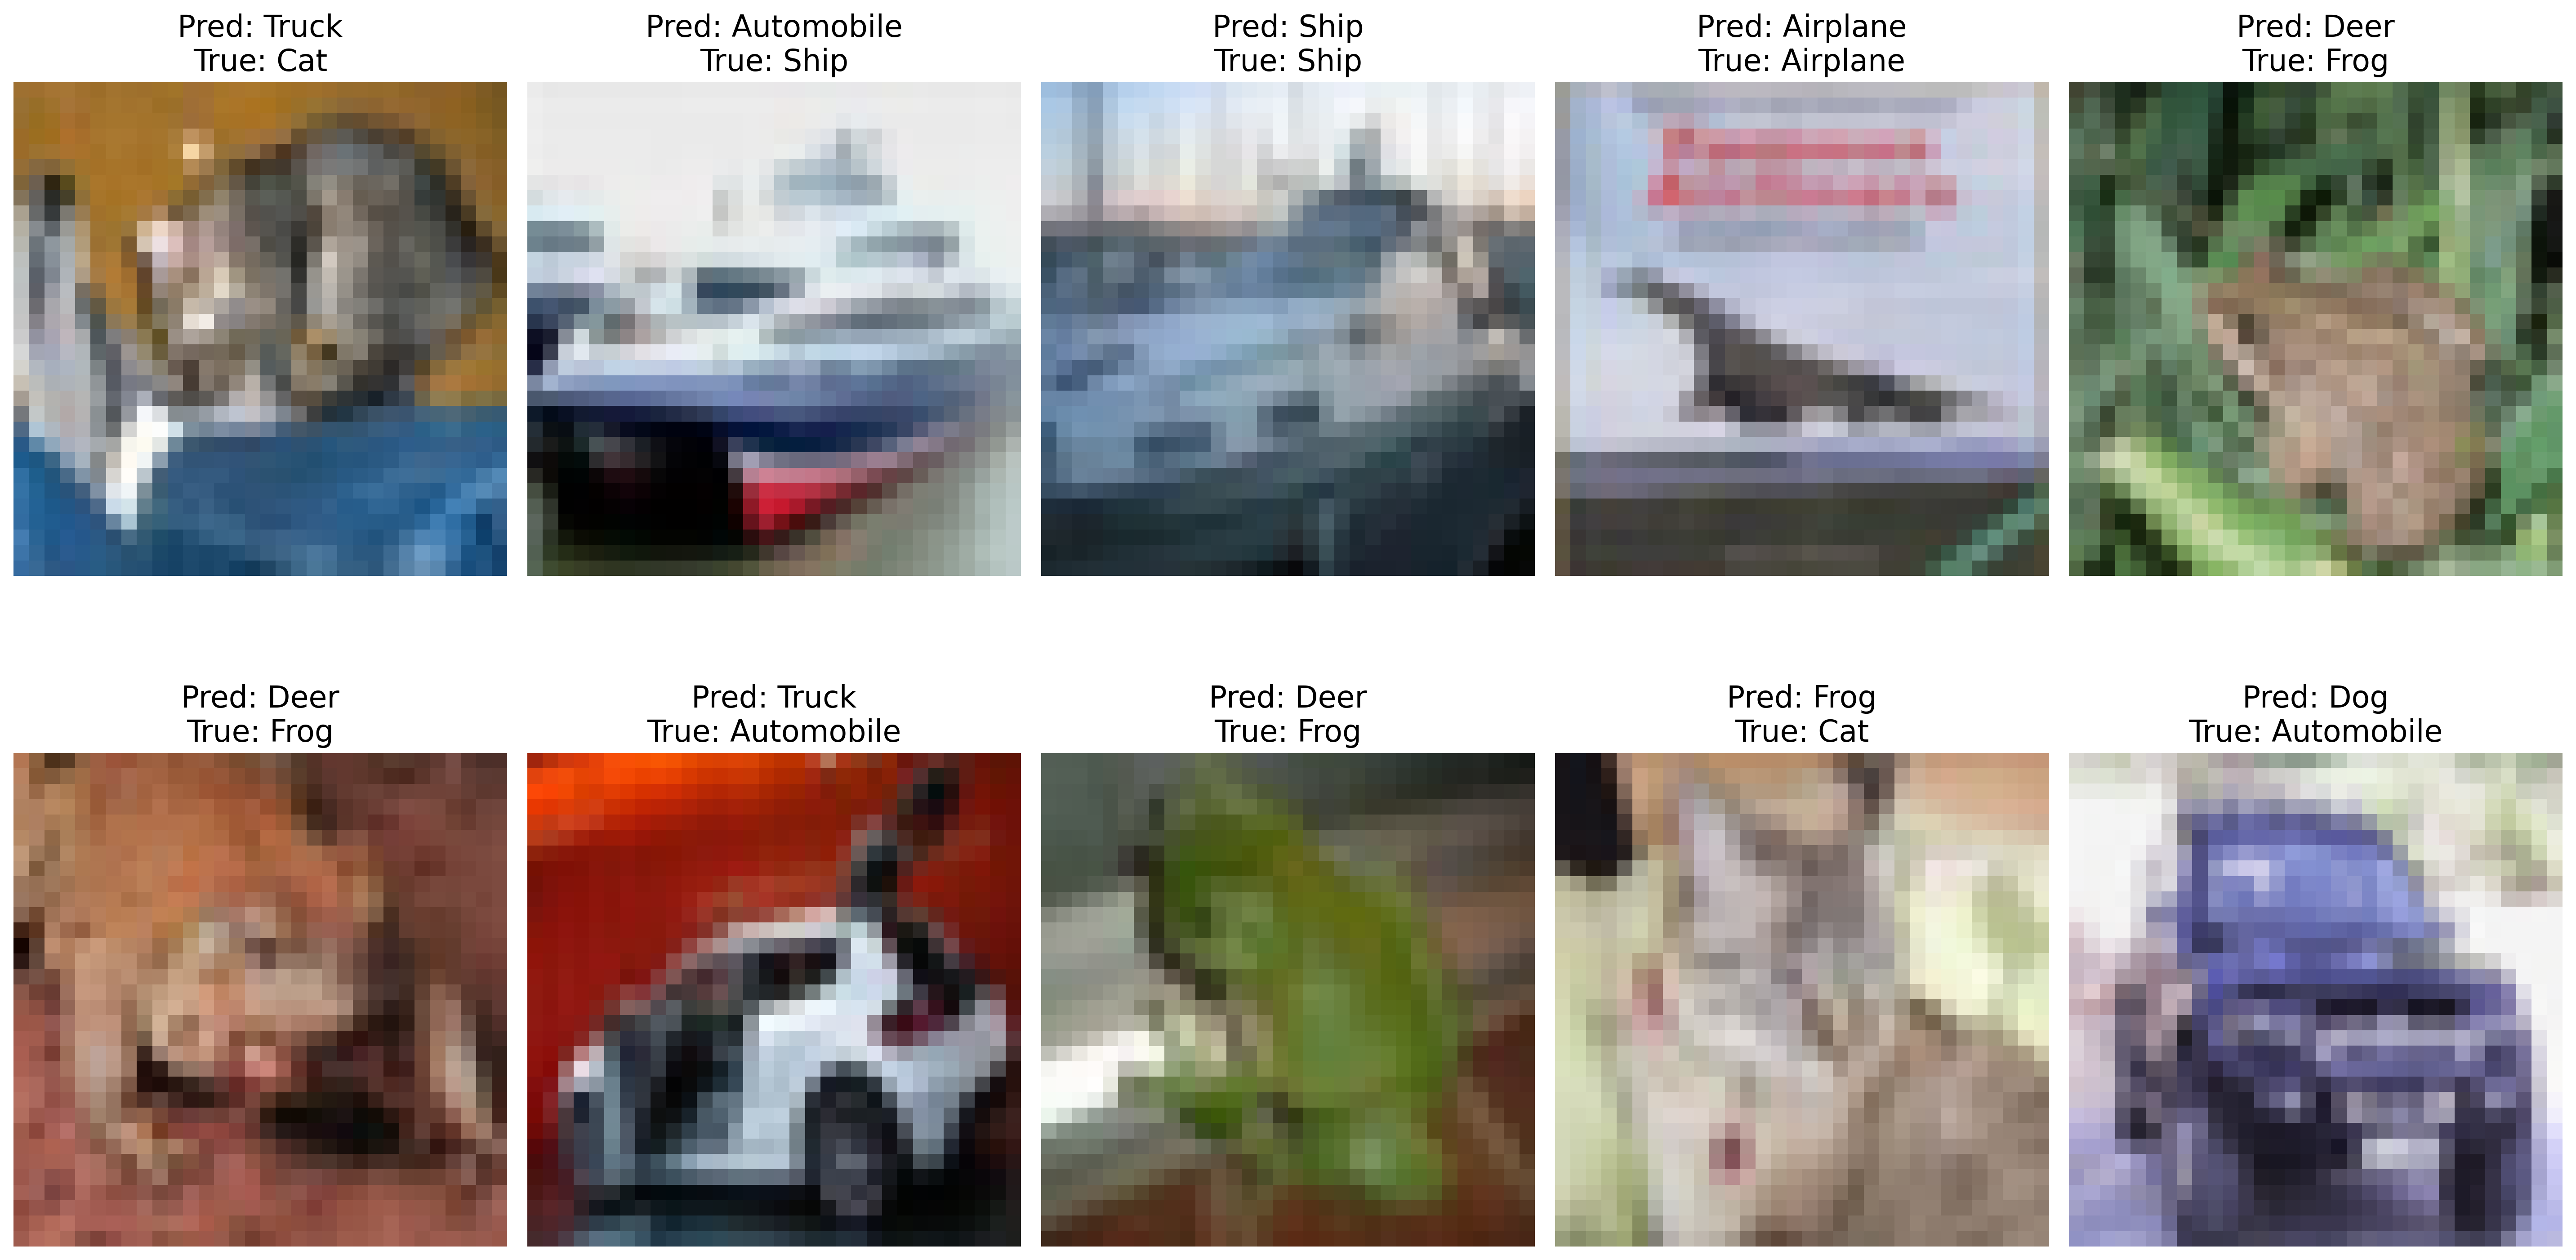

In [12]:
# Make predictions
predictions = model.predict(x_test[:10])

# Visualize predictions in HD quality (1920x1080, 300 dpi)
plt.figure(figsize=(19.2, 10.8), dpi=300)  # High resolution figure for HD quality (1920x1080)
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[i])  # Display image
    plt.title(f"Pred: {class_names[np.argmax(predictions[i])]}\nTrue: {class_names[np.argmax(y_test[i])]}", fontsize=16)
    plt.axis('off')

plt.tight_layout()  # Ensure plots don't overlap
plt.show()

# Optionally save the HD quality image (high DPI for clarity)
plt.figure(figsize=(19.2, 10.8), dpi=300)  # Ensure high DPI when saving
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[i])
    plt.title(f"Pred: {class_names[np.argmax(predictions[i])]}\nTrue: {class_names[np.argmax(y_test[i])]}", fontsize=16)
    plt.axis('off')

plt.tight_layout()
plt.savefig('predictions_HD_quality.png', dpi=300)  # Save image with 300 dpi for excellent quality
